<a href="https://colab.research.google.com/github/sigolyori/my-little-projects/blob/main/thank_u%2C_Nest_(%E1%84%80%E1%85%A9%E1%84%80%E1%85%A2%E1%86%A8%E1%84%91%E1%85%A7%E1%86%BC%E1%84%89%E1%85%A2%E1%86%BC%E1%84%80%E1%85%A1%E1%84%8E%E1%85%B5_%E1%84%80%E1%85%B5%E1%84%87%E1%85%A1%E1%86%AB_%E1%84%80%E1%85%A9%E1%84%80%E1%85%A2%E1%86%A8%E1%84%89%E1%85%A6%E1%84%87%E1%85%AE%E1%86%AB%E1%84%92%E1%85%AA_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# thank u, Nest

## 사전 준비 코드

### 라이브러리 호출 및 한글 출력 관련 설정

---



---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colab에서 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq -y # -y 플래그를 추가하여 자동 yes 응답

# 설치된 나눔스퀘어 ac 폰트 경로 찾기
font_files = !fc-list :lang=ko | grep "NanumGothicCoding"

# 찾은 폰트 경로를 사용
if font_files:
    # 첫 번째 찾은 경로를 사용
    font_path = font_files[0].split(':')[0]
    print(f"Found font path: {font_path}")

    import matplotlib.font_manager as fm

    fm.fontManager.addfont(font_path)

    plt.rc('font', family='NanumGothicCoding')
    sns.set_theme(font="NanumGothicCoding")

    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False
else:
    print("NanumGothicCoding font not found after installation. Please check installation.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Found font path: /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf


## 고객평생가치 기반 세분화 분석

### 배경

모든 고객은 동일한 가치를 지니지 않습니다. Fader의 저서에서 언급된 '모든 손님은 왕이다'라는 전통적인 접근 방식은 모든 고객을 동등하게 대우하려는 경향을 보입니다. 하지만 고객 평생 가치(Customer Lifetime Value, CLV) 관점에서 보면, 모든 고객이 비즈니스에 동일한 기여를 하는 것은 아닙니다. 성공적인 비즈니스를 위해서는 한정된 자원을 보다 잠재 가치가 높은 고객에게 집중하고, 이들을 중심으로 비즈니스 전략을 전개하는 고객 중심(Customer Centricity) 경영이 필수적입니다. 고객 중심 경영은 마케팅 활동을 측정 가능한 지표로 전환하며, 고객 관계 관리(Customer Relationship Management, CRM) 시스템을 통해 확보된 고객 데이터를 기반으로 고객을 깊이 이해하고, 이를 통해 궁극적으로 기업 이익을 극대화하는 것을 목표로 합니다.

단순히 고객 정보를 기록하는 것만으로는 충분하지 않습니다. CRM의 진정한 가치는 기록된 정보를 적극적으로 활용하여 고객 개개인에 대한 이해를 높이고, 이를 바탕으로 맞춤형 전략을 수립하는 데 있습니다.

이러한 고객 평생 가치 접근법은 고객을 정량적으로 이해하고, 그 결과를 실제 마케팅 전략에 적용하려는 시도입니다. 마침 이러한 분석을 실제 데이터를 활용해 실습해 볼 기회를 찾던 중, 본 공모전을 알게 되어 참여하게 되었습니다.



### 데이터 설명

분석에 사용된 데이터는 다음과 같습니다.

- 온라인 거래 관련 데이터 (Sales Data)

- 고객 정보 데이터 (Customer Data)

- 할인 정보 데이터 (Discount Data)

- 마케팅 비용 정보 데이터 (Marketing Cost Data)

- 세금 관련 정보 데이터 (Tax Data)



### 데이터 탐색

이 중 주요 분석 대상인 온라인 거래(Sales) 데이터 내 제품 카테고리별 판매 수량 및 판매 금액을 분석한 결과는 다음과 같습니다.



판매 금액 비중에서는 Nest 계열(Nest-USA, Nest, Nest-Canada) 제품이 과반수를 차지하는 것으로 나타났습니다. 반면, 판매 수량 비중에서는 Office, Apparel, Drinkware 등의 카테고리가 높은 비중을 차지했습니다. 이는 Nest 계열 제품이 상대적으로 고가이며 구매 주기가 긴 반면, Office, Apparel, Drinkware 등의 카테고리는 비교적 저렴하고 구매 빈도가 높은 품목이기 때문으로 해석됩니다. 이러한 상품 특성의 차이는 고객 분석 시 반드시 고려되어야 할 중요한 요소입니다.


### 데이터 전처리

#### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 데이터를 저장한 Google Drive 경로로 수정
data_path = '/content/drive/MyDrive/700. 프로젝트/740. 데이터분석/02. thank-u-nest/01. data/'

customer = pd.read_csv(data_path + 'Customer_info.csv')
discount = pd.read_csv(data_path + 'Discount_info.csv')
marketing = pd.read_csv(data_path + 'Marketing_info.csv')
onlinesales = pd.read_csv(data_path + 'Onlinesales_info.csv')
tax = pd.read_csv(data_path + 'Tax_info.csv')

Mounted at /content/drive


#### 날짜 전처리

In [13]:
month_dict = {
  'Jan': 1,
  'Feb': 2,
  'Mar': 3,
  'Apr': 4,
  'May': 5,
  'Jun': 6,
  'Jul': 7,
  'Aug': 8,
  'Sep': 9,
  'Oct': 10,
  'Nov': 11,
  'Dec': 12
}

In [14]:
discount['월'] = discount.월.replace(month_dict)

In [15]:
marketing['날짜'] = pd.to_datetime(marketing['날짜'], format='%Y-%m-%d')

In [16]:
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'], format='%Y-%m-%d')

In [17]:
# 연, 월, 일 추출
onlinesales['연'] = onlinesales['거래날짜'].dt.year
onlinesales['월'] = onlinesales['거래날짜'].dt.month
onlinesales['일'] = onlinesales['거래날짜'].dt.day

#### 고객의 실구매금액 계산

- 세전가격 = (평균비용 * 수량) * (1-할인율)
- 세후가격(실구매금액) = 세전가격*(1+세율)

In [18]:
sales = (onlinesales
 .merge(customer, on='고객ID', how='left')
 .merge(tax, on='제품카테고리', how='left')
 .merge(marketing, left_on='거래날짜', right_on='날짜', how='left')
 .merge(discount, on=['월','제품카테고리'], how='left')
)

sales['세전가격'] = np.where(sales.쿠폰상태 == 'Used',
                         (sales.평균금액 * sales.수량) * (1-(1/100 * sales.할인율)) + sales.배송료,
                         (sales.평균금액 * sales.수량) + sales.배송료
                        )
sales['세후가격'] = sales.세전가격*(1+sales.GST)


### 데이터 분석

[RFM 분석 및 RFM/P 분석의 개념도 추가 필요]

분석은 두 Phase로 나뉘어 진행된다. 첫번째 페이즈에서는 RFM/P 분석을 수행한다. 두번째 페이즈에서는 RFM/P 수치를 기반으로 고객평생가치를 구한다.

RFM 분석은 최근구매 (Recency), 구매주기(Frequency)와 금전가치(Monetary Value)를 산출하여 고객을 세분화하는 방법이다. RFP 분석은 카테고리의 차이를 고려하지 않고 최근구매 (Recency), 구매주기(Frequency)와 금전가치(Monetary Value)를 산출하여 RFM 분석을 수행하면 오류를 일으킬 수 있다. [근거 필요]

이에 따라 카테고리를 고려한 RFM 분석, 즉 RFM/P (Recency, Frequency, Monetary Value per Product category) 분석을 수행했다.

RFM 분석과 같은 고객 세분화를 시도하는 것은 가치 있는 고객을 알아보기 위함이다. 고객의 가치를 파악하기 위해 RFM 지표로부터 $t$ 시점까지 고객 $i$ 의 카테고리 $j$ 에 대한 예상구매금액과 예상구매횟수를 구했으며, 이는 각각 Gamma-Gamma 모델과 BG/NBD 모델로부터 추정되었다.

[Gamma-Gamma 모델과 BG/NBD 모델에 대한 간략한 설명 추가]

이 글에서는 미래 52주(t=52)에 대한 모든 유 저의 ‘More Bags’, ‘Android’를 제외한 카테고리에 대한 예상구매금액과 예상구매횟수를 구했다.
$$고객가치_{ij} = 예상구매금액_{ij} ×예상구매횟수_{ij}$$
추정된 예상구매금액과 예상구매횟수의 곱이 고객/카테고리별 고객가치이며, 이로부터 아래와 같은 고객/제품 평생가치 포트폴리오를 구축할 수 있다. 포트폴리오 내 고객/카테고리별 가치를 고객별로 합산한 값이 고객평생가치이다.



### 분석결과

[그래프 및 설명 추가 예정]



### 인사이트 및 기대효과

[기대 효과 시뮬레이션]


### ① 세분화 방식 선택
#### 카테고리별 판매금액 및 판매수량의 비중

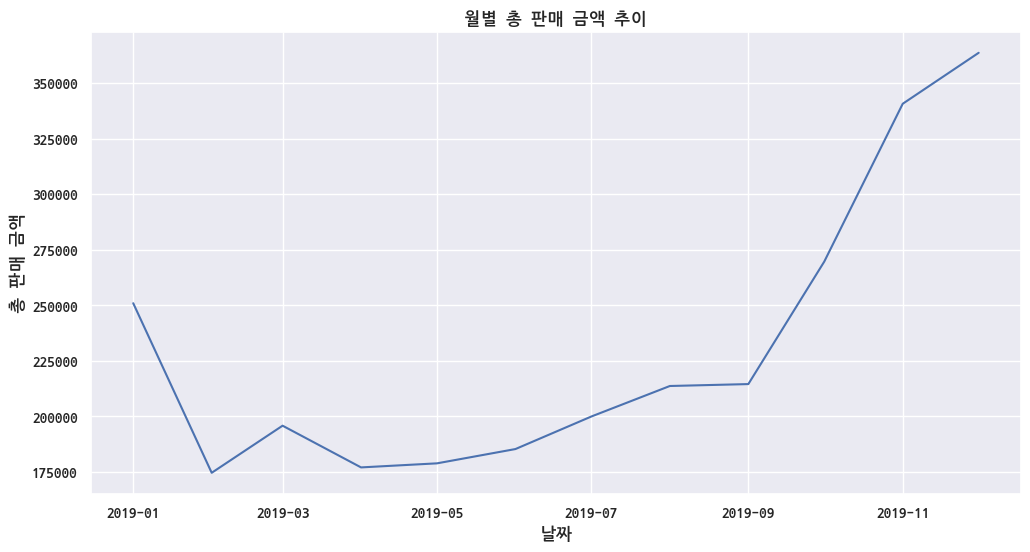

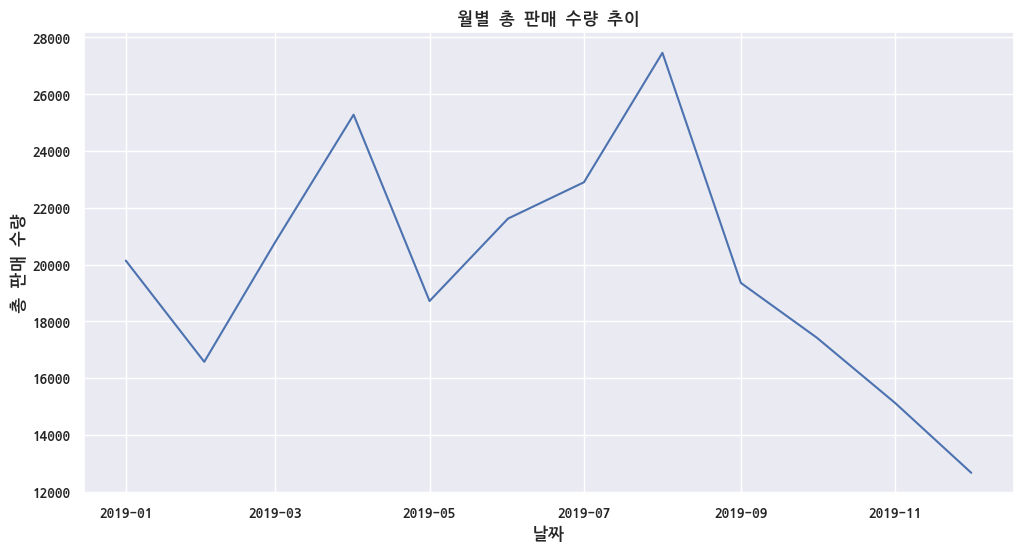

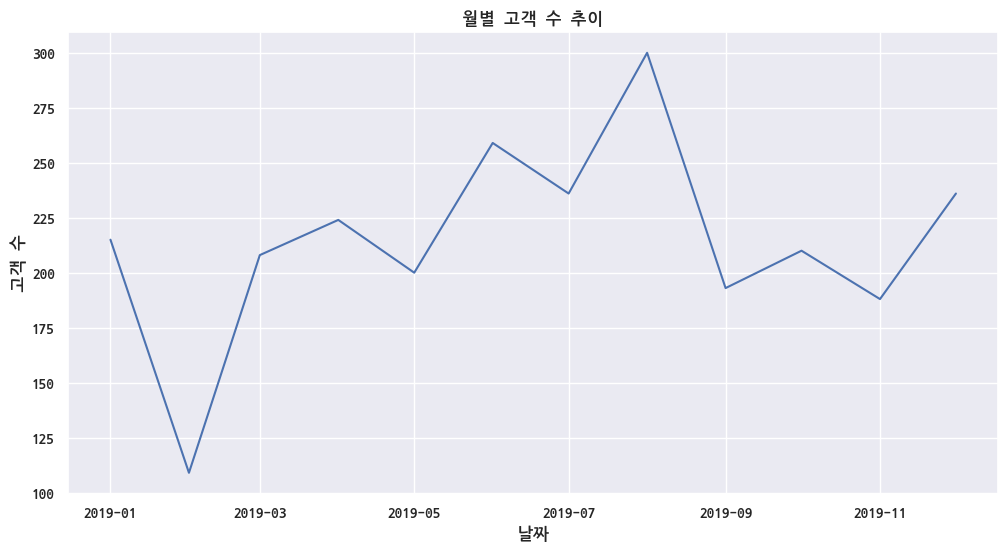

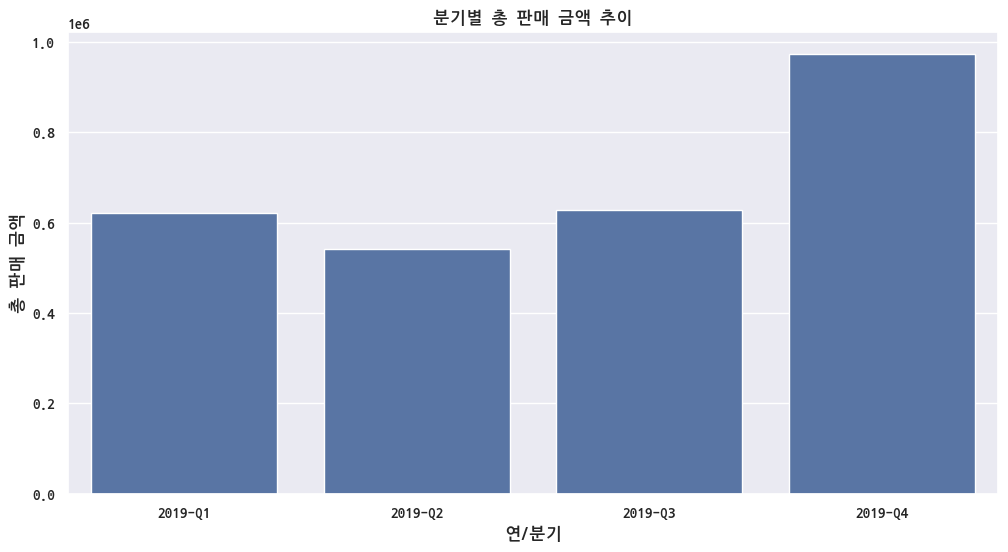

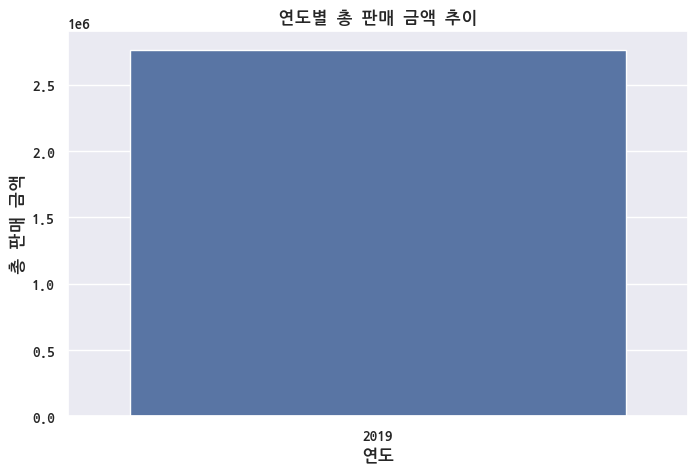

In [ ]:
# ##### 시간에 따른 판매 추이 분석
#
# 월별, 분기별, 연도별 판매액, 판매량, 고객 수 변화를 시각화하여 판매 추이를 파악합니다.

# %%
# 월별 판매 추이
monthly_sales = onlinesales.groupby(['연', '월']).agg(
    총판매금액=('평균금액', 'sum'),
    총판매수량=('수량', 'sum'),
    고객수=('고객ID', 'nunique')
).reset_index()

monthly_sales['날짜'] = pd.to_datetime(monthly_sales['연'].astype(str) + '-' + monthly_sales['월'].astype(str) + '-01')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='날짜', y='총판매금액')
plt.title('월별 총 판매 금액 추이')
plt.xlabel('날짜')
plt.ylabel('총 판매 금액')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='날짜', y='총판매수량')
plt.title('월별 총 판매 수량 추이')
plt.xlabel('날짜')
plt.ylabel('총 판매 수량')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='날짜', y='고객수')
plt.title('월별 고객 수 추이')
plt.xlabel('날짜')
plt.ylabel('고객 수')
plt.show()

# 분기별 판매 추이
onlinesales['분기'] = onlinesales['거래날짜'].dt.quarter
quarterly_sales = onlinesales.groupby(['연', '분기']).agg(
    총판매금액=('평균금액', 'sum'),
    총판매수량=('수량', 'sum'),
    고객수=('고객ID', 'nunique')
).reset_index()

quarterly_sales['연분기'] = quarterly_sales['연'].astype(str) + '-Q' + quarterly_sales['분기'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_sales, x='연분기', y='총판매금액')
plt.title('분기별 총 판매 금액 추이')
plt.xlabel('연/분기')
plt.ylabel('총 판매 금액')
plt.show()

In [ ]:
t3 = sales.loc[:, ['제품카테고리', '수량', '세후가격']].groupby('제품카테고리').sum()
t3 = pd.concat([t3, t3 / t3.sum()], axis=1)
t3.columns = ['판매수량', '판매금액', '판매수량_비율', '판매금액_비율']
t3.reset_index(inplace=True)

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

nanum_fonts = [f for f in font_list if 'Nanum' in f]
print("설치된 나눔 폰트 목록:")
for f in nanum_fonts:
    print(f)

설치된 나눔 폰트 목록:
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

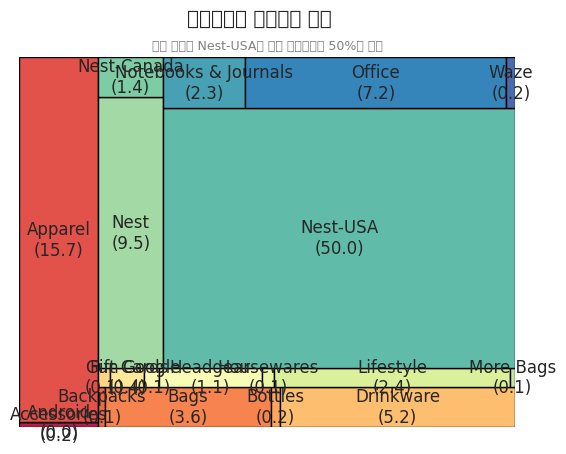

In [ ]:
!pip install squarify
import squarify

label = t3.제품카테고리 + '\n(' + round(t3.판매금액_비율*100, 1).astype(str) + ')'
squarify.plot(t3.판매금액_비율, label=label, ec = 'black',
              color = sns.color_palette("Spectral", len(t3)))
plt.axis("off")
plt.suptitle('카테고리별 판매금액 비중')
plt.title('고가 제품인 Nest-USA가 전체 판매금액의 50%를 차지',fontsize=9, color='gray')
plt.show()

### ② 고객별 RFM/P(Recency, Frequency, Monetary value per Product category) 계산

In [ ]:
Recency = (sales
.groupby(['고객ID', '제품카테고리'])['거래날짜']
.max()
.transform(lambda x: pd.to_datetime('2019-12-31') - x)
.rename('Recency')
.to_frame()
.reset_index()
)

In [ ]:
Duration = (sales
.groupby(['고객ID', '제품카테고리'])['거래날짜']
.min()
.transform(lambda x: pd.to_datetime('2019-12-31') - x)
.rename('Duration')
.to_frame()
.reset_index()
)

In [ ]:
Frequency = (sales
 .loc[:, ['고객ID', '제품카테고리', '거래날짜']]
 .groupby(['고객ID', '제품카테고리', '거래날짜'])
 .head(1)
 .groupby(['고객ID', '제품카테고리'])
 .count()
 .loc[:,'거래날짜']
 .to_frame()
 .rename({'거래날짜':'Frequency'}, axis=1)
 .reset_index()
 .assign(Frequency = lambda x: x.Frequency - 1)
)

In [ ]:
Monetary = (sales
 .loc[:,['고객ID','제품카테고리', '세후가격']]
 .groupby(['고객ID', '제품카테고리'])
 .sum()
 .rename({'세후가격':'Monetary'}, axis=1)
 .reset_index()
)

In [ ]:
RFM = pd.merge(Recency, Frequency, on=['고객ID', '제품카테고리'])
RFM = pd.merge(RFM, Duration, on=['고객ID', '제품카테고리'])
RFM = pd.merge(RFM, Monetary, on=['고객ID', '제품카테고리'])

In [ ]:
RFM['Monetary'] = RFM['Monetary'] / (RFM['Frequency']+1)
RFM['Recency'] = RFM.Recency.dt.days
RFM['Duration'] = RFM.Duration.dt.days

In [ ]:
RFM['Recency'] = np.where(RFM['Recency'] == RFM['Duration'], 0, RFM['Recency'])
RFM['Recency'] = RFM['Recency'] / 7
RFM['Duration'] = RFM['Duration'] / 7
RFM['Frequency'] = RFM['Frequency'].astype(float)

### ③ 고객별 RFM/P 결과 해석

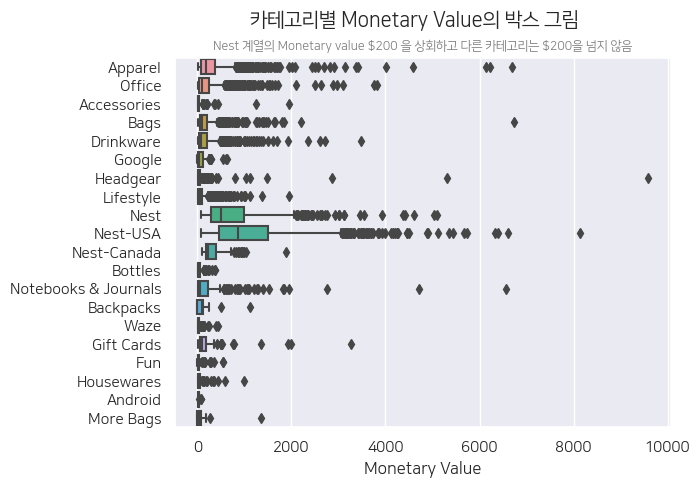

In [ ]:
import seaborn as sns

# 카테고리별 박스플롯
sns.boxplot(x='Monetary', y='제품카테고리', orient='h', data=RFM)

plt.xlabel('Monetary Value')
plt.ylabel('')
plt.suptitle('카테고리별 Monetary Value의 박스 그림')
plt.title('Nest 계열의 Monetary value \$200 을 상회하고 다른 카테고리는 \$200을 넘지 않음',fontsize=9, color='gray')
plt.show()

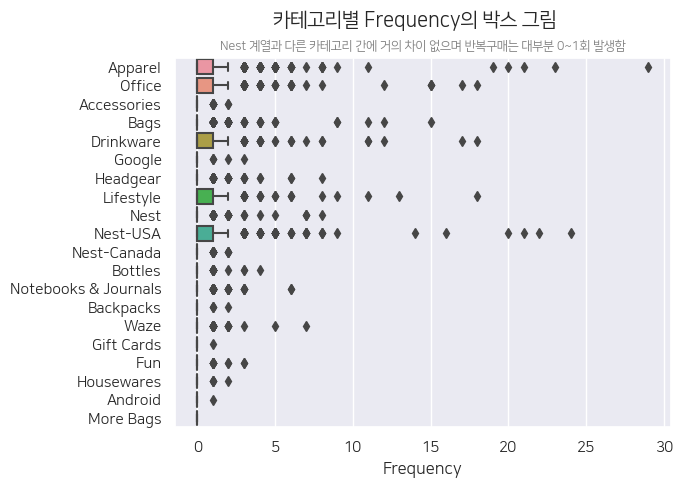

In [ ]:
import seaborn as sns

# 카테고리별 박스플롯
sns.boxplot(x='Frequency', y='제품카테고리', orient='h', data=RFM)

plt.suptitle('카테고리별 Frequency의 박스 그림')
plt.title('Nest 계열과 다른 카테고리 간에 거의 차이 없으며 반복구매는 대부분 0~1회 발생함',fontsize=9, color='gray')
plt.ylabel('')
plt.show()

### ④ RFM/P로부터 고객평생가치(CLV, Customer Lifetime Value) 계산 및 고객 세분화

#### BG/NBD 모델 (예상구매횟수)

In [ ]:
from scipy.special import gammaln

def negative_log_likelihood(params, x, t_x, T):
    if np.any(np.asarray(params) <= 0):
        return np.inf

    r, alpha, a, b = params

    ln_A_1 = gammaln(r+x) - gammaln(r) + r*np.log(alpha + 1e-6)
    ln_A_2 = (gammaln(a+b) + gammaln(b+x) - gammaln(b) - gammaln(a+b+x))
    ln_A_3 = -(r+x) * np.log(alpha+T+1e-6)
    ln_A_4 = x.copy()
    ln_A_4[ln_A_4 > 0] = (
        np.log(a+ 1e-6) -
        np.log(b + ln_A_4[ln_A_4 > 0] - 1 + 1e-6) -
        (r+ln_A_4[ln_A_4 > 0]) * np.log(alpha+t_x+ 1e-6)
    )

    delta = np.where(x>0, 1, 0)

    log_likelihood = ln_A_1 + ln_A_2 + np.log(np.exp(ln_A_3) + delta * np.exp(ln_A_4) + 1e-6)

    return -log_likelihood.sum()

In [ ]:
def calculate_conditional_expectation(t, x, t_x, T):
    first_term = (a+b+x-1) / (a-1)
    hyp2f1_a = r+x
    hyp2f1_b = b+x
    hyp2f1_c = a + b + x - 1
    hyp2f1_z = t / (alpha + T + t)
    hyp_term = hyp2f1(hyp2f1_a, hyp2f1_b, hyp2f1_c, hyp2f1_z)
    second_term = (1 - ((alpha+T) / (alpha+T+t))**(r+x) * hyp_term)
    delta = np.where(x > 0, 1, 0)
    denominator = 1 + delta * (a/(b+x-1)) * ((alpha+T) / (alpha+t_x))**(r+x)

    return first_term * second_term / denominator

In [ ]:
def _func_caller(params, func_args, function):
    return function(params, *func_args)

In [ ]:
from scipy.optimize import minimize

def fit_bgf(grouped):

    scale = 1 / grouped['Duration'].max()
    scaled_recency = grouped['Recency'] * scale
    scaled_T = grouped['Duration'] * scale

    current_init_params = np.ones(4)

    output = minimize(
        _func_caller,
        method='Nelder-Mead',
        tol=0.0001,
        x0=current_init_params,
        args=([grouped['Frequency'], scaled_recency, scaled_T], negative_log_likelihood),
        options={'maxiter':2000}
    )

    r = output.x[0]
    alpha = output.x[1]
    a = output.x[2]
    b = output.x[3]

    alpha /= scale

    print("r = {}".format(r))
    print("alpha = {}".format(alpha))
    print("a = {}".format(a))
    print("b = {}".format(b))

    return r, alpha, a, b

#### Gamma-Gamma 모델 (예상구매금액)

In [ ]:
from scipy.special import gammaln
from scipy.optimize import minimize
from scipy.stats import invgamma

def negative_log_likelihood_ggf(params, x, bar_z):
    if np.any(np.asarray(params) <= 0):
        return np.inf

    p, q, gamma = params

    log_likelihood = np.where(x == 0, 0, gammaln(p*x + q) - gammaln(p*x) - gammaln(q) + q*np.log(gamma + 1e-6) + (p*x-1)*np.log(bar_z + 1e-6) + p*x*np.log(x + 1e-6)  - (p*x+q)*np.log(gamma + x*bar_z + 1e-6))

    return -log_likelihood.sum()

def fit_ggf(grouped):

    current_init_params = np.ones(3)

    output = minimize(
        _func_caller,
        method='Nelder-Mead',
        tol=0.0001,
        x0=current_init_params,
        args=([grouped['Frequency'], grouped['Monetary']], negative_log_likelihood_ggf),
        options={'maxiter':2000}
    )

    p = output.x[0]
    q = output.x[1]
    gamma = output.x[2]

    print("p = {}".format(p))
    print("q = {}".format(q))
    print("gamma = {}".format(gamma))

    return p, q, gamma

def calculate_conditional_expectation_ggf(x, z_bar):

    # q가 1보다 작은 경우 알려진 mean이 없음
    if q < 1:
        z = [np.mean(invgamma.rvs(q, scale=p*gamma, size=100)) for i in range(100)]
        expectation_z = np.mean(z)
        weight = (q-1)/(p*x+q-1)

    elif q == 1:
        expectation_z = 0
        weight = 0

    else:
        expectation_z = p*gamma/(q-1)
        weight = (q-1)/(p*x+q-1)

    return weight*expectation_z + (1-weight)*z_bar

#### 고객평생가치 계산

In [ ]:
df = pd.DataFrame(columns=['고객ID', '제품카테고리', 'Recency', 'Frequency',
                      'Duration', 'Monetary','predicted_purchases', 'expected_average_profit'])
t = 52

for category, grouped in RFM.groupby('제품카테고리'):

    if (category == 'More Bags') | (category == 'Android'):
        continue

    print(category)
    print('----------------------')

    r, alpha, a, b = fit_bgf(grouped)
    grouped['predicted_purchases'] = calculate_conditional_expectation(t,
                                                                 grouped['Frequency'],
                                                                 grouped['Recency'],
                                                                 grouped['Duration'])

    p, q, gamma = fit_ggf(grouped)

    grouped['expected_average_profit'] = calculate_conditional_expectation_ggf(grouped['Frequency'], grouped['Monetary'])

    df = pd.concat([df, grouped], ignore_index=True)

Accessories
----------------------
r = 0.13912008073722326
alpha = 8.176630570812936
a = 1052808.6234128857
b = 501402.9633816013
p = 1.8348050677519895e+133
q = 3.5580081632721924e+127
gamma = 4.6042778608761196e-05
Apparel
----------------------


/tmp/ipykernel_226/806044944.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, grouped], ignore_index=True)


r = 0.17923159086008145
alpha = 1.1903404140925717
a = 12.696467541252009
b = 27.601082880439954
p = 2.5129593127494996
q = 2.6069465924123243
gamma = 208.15006556477317
Backpacks
----------------------
r = 0.26646419623447243
alpha = 116.52392596923818
a = 9.394653723311084e-10
b = 2.2672142445478647
p = 3.727981318000165e+89
q = 2.5337574645747155e+84
gamma = 0.0005354572432201953
Bags
----------------------
r = 0.1268609869185903
alpha = 2.966232640652436
a = 7.316117332170791
b = 12.390568106079222
p = 3.4224680850941467
q = 2.77620821431516
gamma = 93.17829522329001
Bottles
----------------------
r = 0.32202021881812226
alpha = 58.88183726710254
a = 7.542067151205418e-08
b = 1.7094503770590088
p = 2.743222204193875e+64
q = 1.4604030300902113e+58
gamma = 7.526130258503049e-06
Drinkware
----------------------
r = 0.15220915102007612
alpha = 2.6623905053523713
a = 5.545536572500552
b = 9.173539222442841
p = 2.090490964871371
q = 2.4401314642392835
gamma = 139.90068112083412
Fun
-----

In [ ]:
df['CLV'] = df['predicted_purchases'] * df['expected_average_profit']

In [ ]:
table = df.pivot(index='고객ID',columns='제품카테고리', values='CLV').fillna(0)

In [ ]:
groups = pd.qcut(table.sum(axis=1), q=10, labels=np.arange(10)+1).rename('Group')

### ⑤ 결과 해석

Text(0.5, 1.0, '10분위 \\$2,926 1분위는 \\$92 로 크게 차이남')

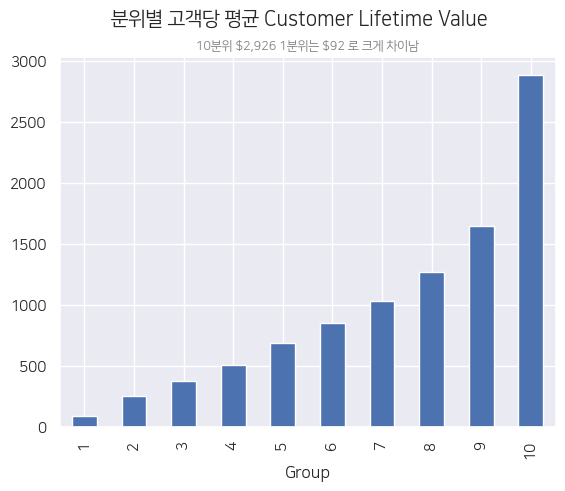

In [ ]:
(t7.sum(axis=1) / groups.value_counts()).plot.bar()
plt.suptitle('분위별 고객당 평균 Customer Lifetime Value')
plt.title('10분위 \$2,926 1분위는 \$92 로 크게 차이남',fontsize=9, color='gray')

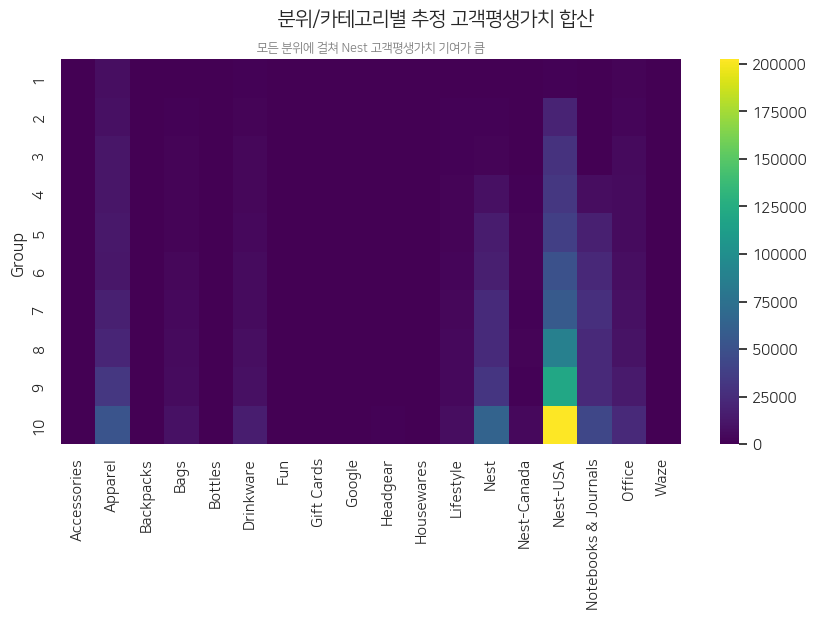

In [ ]:
t7 = table.join(groups).groupby('Group', observed=False).sum()
cmap = "viridis"
plt.figure(figsize=(10, 5))
sns.heatmap(t7, cmap=cmap)
plt.suptitle('분위/카테고리별 추정 고객평생가치 합산')
plt.title('모든 분위에 걸쳐 Nest 고객평생가치 기여가 큼',fontsize=9, color='gray')
# plt.show()
plt.savefig('plot.png', bbox_inches="tight")

In [ ]:
t8 = t7.apply(lambda col: col / t7.sum(axis=1), axis=0)

In [ ]:
other_cols = table.sum(axis=0).sort_values()[:10].index.values

In [ ]:
main_cols = [col for col in t8.columns.values if col not in other_cols]

In [ ]:
t8['Others'] = t8[other_cols].sum(axis=1)
t8 = t8[np.append(main_cols, 'Others')]

Text(0.5, 1.0, '분위가 높아질수록 Nest, Nest-USA가 차지하는 비중이 커짐')

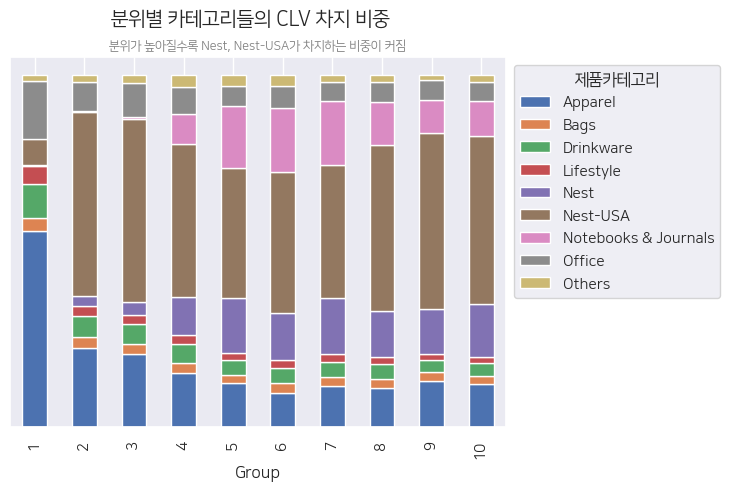

In [ ]:
t8.plot.bar(stacked=True)

plt.legend(title="제품카테고리", bbox_to_anchor = (1,1))
plt.yticks([])
plt.suptitle('분위별 카테고리들의 CLV 차지 비중')
plt.title('분위가 높아질수록 Nest, Nest-USA가 차지하는 비중이 커짐',fontsize=9, color='gray')

### 참고문헌

- Fader, P. S., Hardie, B. G., & Lee, K. L. (2005). “Counting your customers” the easy way: An alternative to the Pareto/NBD model. Marketing science, 24(2), 275-284.

- Fader, P. S., & Hardie, B. G. (2013). The Gamma-Gamma model of monetary value. February, 2, 1-9.

- Heldt, R., Silveira, C. S., & Luce, F. B. (2021). Predicting customer value per product: From RFM to RFM/P. Journal of Business Research, 127, 444-453.

- Ben Alex Keen. (2018). BG-NBD Model for Customer Base Analysis in Python. Ben Alex Keen Blog. https://benalexkeen.com/bg-nbd-model-for-customer-base-analysis-in-python/